# Install and imports


In [1]:


#!pip install git+https://github.com/GabrieleSgroi/image_composition_diffusion

In [2]:
from diffusion_composition.pipeline import DiffusionCompositionPipeline
from diffusion_composition.prompting import BoundingBoxPromptSetter
from diffusion_composition.utils import load_models, upscale_image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [4]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-base")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

# Download the models and initialize the pipeline

In [5]:
models = load_models()


comp = DiffusionCompositionPipeline(vae=models['vae'],
                                   unet=models['unet'],
                                   scheduler=models['scheduler'])

text_encoder/config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

# Set the prompts

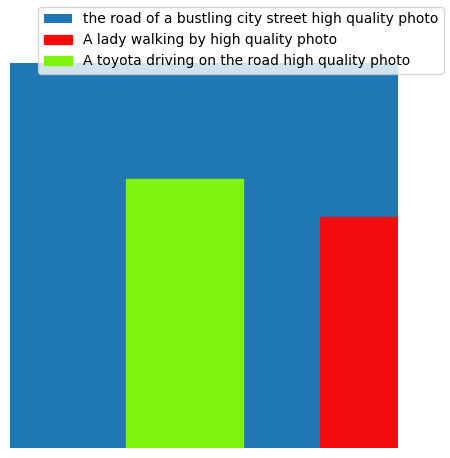

In [6]:
prompt_setter = BoundingBoxPromptSetter(text_encoder=models['text_encoder'], tokenizer=models['tokenizer'])

prompt_setter.set_background_prompt("the road of a bustling city street", guidance_scale=7.5)

#Prompts set first are put in the foreground in case of intersections
prompt_setter.add_local_prompt("A toyota driving on the road",
                               top_margin=0.3,
                               bottom_margin=0.,
                               left_margin=0.3,
                               right_margin=0.4)


prompt_setter.add_local_prompt("A lady walking by",
                               top_margin=0.4,
                               bottom_margin=0.,
                               left_margin=0.8,
                               right_margin=0.)


prompt_setter.add_to_all_prompts("high quality photo")
fig = prompt_setter.draw_bboxes('bboxes.png')
plt.show(fig)

# Generate the image

100%|██████████| 50/50 [00:16<00:00,  3.03it/s]


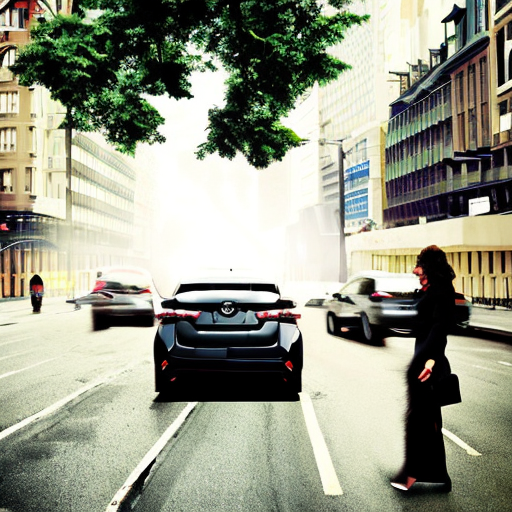

In [7]:
img = comp(prompt_setter=prompt_setter,
           num_inference_steps=50,
           bootstrap_steps=5,
           device='cuda',
           batch_size=6)
img = Image.fromarray((img * 255).round().astype(np.uint8))
img.save("generated_image.png")
display(img)

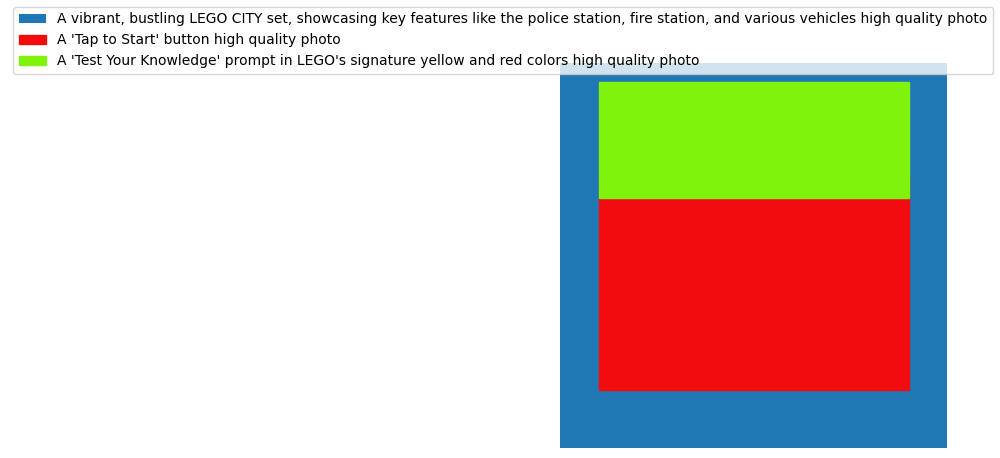

In [12]:
#from matplotlib import pyplot as plt
#from text2scene.prompt_setting import BoundingBoxPromptSetter
# Create a BoundingBoxPromptSetter
prompt_setter = BoundingBoxPromptSetter(text_encoder=models['text_encoder'], tokenizer=models['tokenizer'])

# Set the background prompt
prompt_setter.set_background_prompt("A vibrant, bustling LEGO CITY set, showcasing key features like the police station, fire station, and various vehicles", guidance_scale=7.5)

# Add the 'Test Your Knowledge' prompt with adjusted margins for visibility
prompt_setter.add_local_prompt("A 'Test Your Knowledge' prompt in LEGO's signature yellow and red colors",
                               top_margin=0.05,
                               bottom_margin=0.65,
                               left_margin=0.1,
                               right_margin=0.1)

# Add the 'Tap to Start' button
prompt_setter.add_local_prompt("A 'Tap to Start' button",
                               top_margin=0.30,
                               bottom_margin=0.15,
                               left_margin=0.1,
                               right_margin=0.1)

# Add a common prompt to all, in this case, "high quality photo"
prompt_setter.add_to_all_prompts("high quality photo")

# Draw bounding boxes and show the figure
fig = prompt_setter.draw_bboxes('bboxes.png')
plt.show(fig)


100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


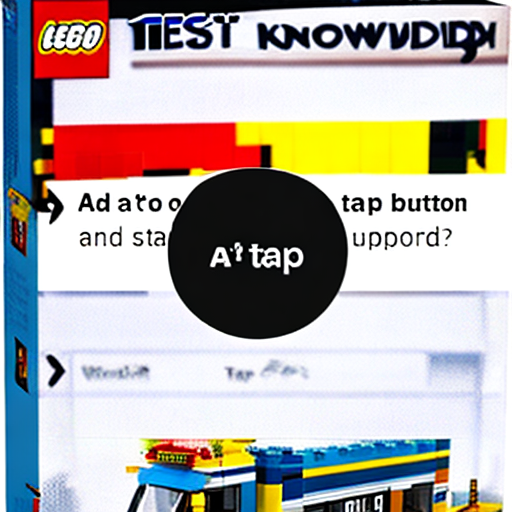

In [11]:
img = comp(prompt_setter=prompt_setter,
           num_inference_steps=50,
           bootstrap_steps=5,
           device='cuda',
           batch_size=6)
img = Image.fromarray((img * 255).round().astype(np.uint8))
img.save("generated_image.png")
display(img)